In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from datetime import datetime
import statsmodels.api as sm
from statsmodels.iolib.table import SimpleTable
from sklearn.metrics import r2_score
import ml_metrics as metrics

In [2]:
df = pd.read_csv('orders_20190822.csv', sep=";",index_col ="o_date", parse_dates=['o_date'],  decimal=',')  

In [3]:
df.head()

,id_o,user_id,price
o_date,,,
2016-01-01,1234491,337544,539.0
2016-01-01,1234494,171642,153.3
2016-01-01,1234497,260596,55.3
2016-01-01,1234498,1105609,752.5
2016-01-01,1234500,982696,4410.0


In [4]:
df1 = df[['price']]

In [5]:
weekly_resampled_data = df1.price.resample('D').mean() 

In [6]:
weekly_resampled_data.head()

o_date
2016-01-01    1846.431419
2016-01-02    2179.590305
2016-01-03    2043.522002
2016-01-04    2319.170931
2016-01-05    2023.681055
Freq: D, Name: price, dtype: float64

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

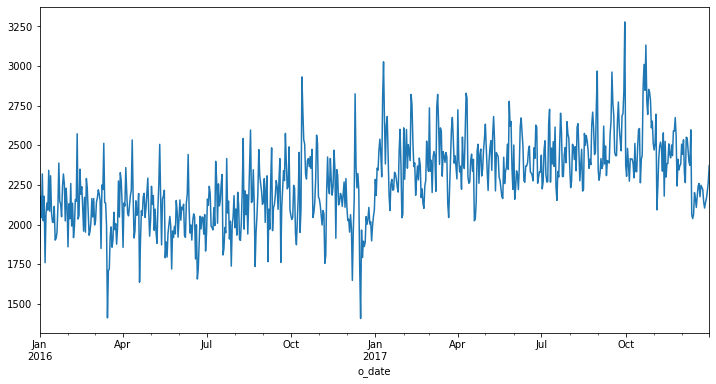

In [9]:
weekly_resampled_data.plot(figsize=(12,6))

In [11]:
df = weekly_resampled_data.copy()

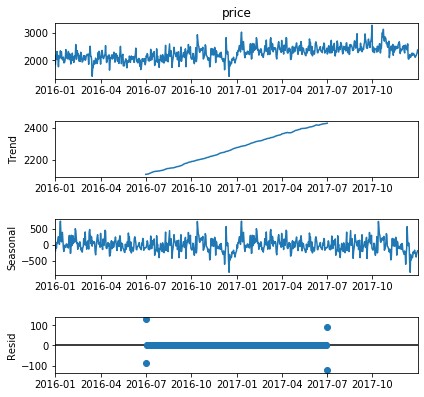

In [16]:
import statsmodels.api as sm
seas_d=sm.tsa.seasonal_decompose(df,model='add',period=365);
fig=seas_d.plot()
fig.set_figheight(6)
plt.show()

In [17]:
train_size=int(len(df) *0.80)
test_size = int(len(df)) - train_size
print(test_size)

147


In [ ]:
train_X, train_y = X[:train_size].dropna(), y[:train_size].dropna()
test_X, test_y = X[train_size:].dropna(), y[train_size:].dropna()

In [18]:
df

o_date
2016-01-01    1846.431419
2016-01-02    2179.590305
2016-01-03    2043.522002
2016-01-04    2319.170931
2016-01-05    2023.681055
                 ...     
2017-12-27    2139.351752
2017-12-28    2165.023518
2017-12-29    2210.042863
2017-12-30    2265.708446
2017-12-31    2371.512230
Freq: D, Name: price, Length: 731, dtype: float64